In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import numpy as np

C:\Users\shell\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
file_path = 'C:/Users/shell/Downloads/Churn-Data.csv'
data = pd.read_csv(file_path)

,cID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,TV_Streaming,Movie_Streaming,Contract,PaperlessBilling,Method_Payment,Charges_Month,TotalCharges,Churn
0,4223-BKEOR,Female,0,No,Yes,21,Yes,No,DSL,Yes,...,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.8,No
1,6035-RIIOM,Female,0,No,No,54,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45,No
2,3797-VTIDR,Male,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45,Yes
3,2568-BRGYX,Male,0,No,No,4,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95,Yes
4,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No


In [3]:
data = data.dropna()

,cID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,TV_Streaming,Movie_Streaming,Contract,PaperlessBilling,Method_Payment,Charges_Month,TotalCharges,Churn
0,4223-BKEOR,Female,0,No,Yes,21,Yes,No,DSL,Yes,...,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.8,No
1,6035-RIIOM,Female,0,No,No,54,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45,No
2,3797-VTIDR,Male,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45,Yes
3,2568-BRGYX,Male,0,No,No,4,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95,Yes
4,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes
5630,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,No
5631,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5632,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


In [4]:
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_columns = categorical_columns.drop(['cID', 'Churn'])
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)


In [5]:
data_encoded['Churn'] = data_encoded['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
data.fillna(0,inplace=True)

,cID,SeniorCitizen,tenure,Charges_Month,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,TotalCharges_990.9,TotalCharges_992.7,TotalCharges_994.55,TotalCharges_995.35,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,4223-BKEOR,0,21,64.85,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,6035-RIIOM,0,54,97.20,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3797-VTIDR,0,1,23.45,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2568-BRGYX,0,4,70.20,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2775-SEFEE,0,0,61.90,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


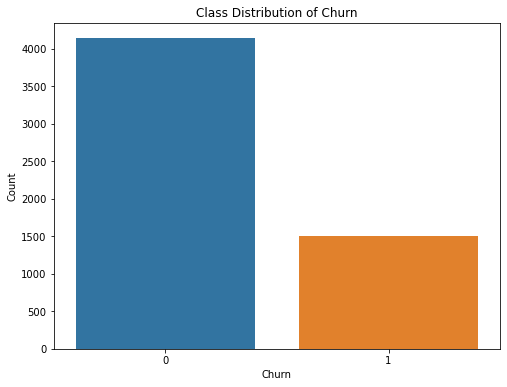

In [6]:
# Visualization
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=data_encoded)
plt.title('Class Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


In [7]:
# Feature Engineering
data_encoded['tenure_bin'] = pd.cut(data_encoded['tenure'], bins=[0, 12, 24, 36, 48, 60, 72], labels=False)
data_encoded.fillna(0,inplace=True)

,cID,SeniorCitizen,tenure,Charges_Month,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,TotalCharges_992.7,TotalCharges_994.55,TotalCharges_995.35,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,tenure_bin
0,4223-BKEOR,0,21,64.85,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1.0
1,6035-RIIOM,0,54,97.20,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,4.0
2,3797-VTIDR,0,1,23.45,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0.0
3,2568-BRGYX,0,4,70.20,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.0
4,2775-SEFEE,0,0,61.90,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0684-AOSIH,0,1,95.00,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0.0
5630,5982-PSMKW,0,23,91.10,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1.0
5631,8044-BGWPI,0,12,21.15,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0.0
5632,7450-NWRTR,1,12,99.45,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.0


In [17]:
X = data_encoded.drop(columns=['cID', 'Churn'])
y = data_encoded['Churn']


In [18]:
from sklearn.utils import resample

#balancing data
X_majority = X[y == 0]
X_minority = X[y == 1]

# Over Sampling minority class
X_minority_upsampled = resample(X_minority,
                                replace=True,    
                                n_samples=len(X_majority),    
                                random_state=42)  

X_resampled = pd.concat([X_majority, X_minority_upsampled])
y_resampled = pd.concat([y[y == 0], y[y == 1].sample(n=len(X_majority), replace=True, random_state=42)])

from sklearn.utils import shuffle
X_resampled, y_resampled = shuffle(X_resampled, y_resampled, random_state=42)


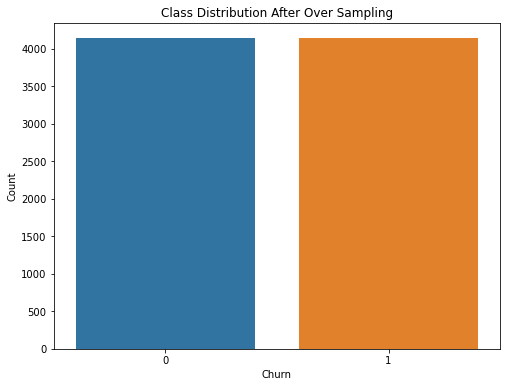

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled)
plt.title('Class Distribution After Over Sampling')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [12]:
#logistic regression model
model = LogisticRegression()
model = LogisticRegression(max_iter=1000)  # Increase the number of iterations
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [14]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluate Accuracy and F1-score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(classification_report(y_test, y_pred))


Accuracy: 0.90
F1 Score: 0.91
              precision    recall  f1-score   support

           0       0.94      0.85      0.90      1225
           1       0.87      0.95      0.91      1258

    accuracy                           0.90      2483
   macro avg       0.91      0.90      0.90      2483
weighted avg       0.91      0.90      0.90      2483

